In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


def select_country(df, country_name):
    df_country = df[df['Country'] == country_name]

    return df_country



Read Data

In [2]:
# read data file with women in parliament historical data
data = pd.read_excel('./data/women_in_parliament-historical_database-1945_to_2018.xlsx')

# pass data to dataframe named df
df = data.copy()

# rename columns
df.rename(columns={
    'Country':'country',
    'Region':'region',
    'Election / Renewal': 'election_renewal',
    'Year':'year',
    'Month':'month',
    'Chamber Type': 'chamber_type',
    'Chamber Total Seats': 'chamber_total_seats',
    'Total women': 'women_total',
    '% Of Women in Chamber': 'women_perc',
    'NOTES':'notes'
}, inplace=True)

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3815 entries, 0 to 3814
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   country              3815 non-null   object
 1   region               3814 non-null   object
 2   election_renewal     3815 non-null   object
 3   year                 3815 non-null   int64 
 4   month                1018 non-null   object
 5   chamber_type         3815 non-null   object
 6   chamber_total_seats  3815 non-null   object
 7   women_total          3814 non-null   object
 8   women_perc           3803 non-null   object
 9   notes                1330 non-null   object
dtypes: int64(1), object(9)
memory usage: 298.2+ KB


None

In [3]:
# transform numerical columns listed as categorical ('women_total', 'women_perc')

## replace non-numerical values for 'women_total' attribute
temp = df['women_total'].unique()
non_numerical_values = [print(item) for i,item in enumerate(temp) if type(item)!= int]
to_replace_dct = {
    '?': np.nan,
    'na':np.nan,
    'Not available':np.nan,
    'nan':np.nan,
    '7 5': 6,
    '14 16': 15,
    '24 22': 23,
    '11 10 ': 10,
    '12 13 10???': 12,
    '20 18 21???': 20,
    '25 29 19???': np.nan
}
df['women_total'].replace(to_replace=to_replace_dct, inplace=True)

## replace non-numerical values for 'women_perc' attribute
temp = df['women_perc'].unique()
non_numerical_values = [print(item) for i,item in enumerate(temp) if type(item)== str]
for i in range(len(df['women_perc'])):
    if type(df['women_perc'].iloc[i]) == str and df['women_perc'].iloc[i][-1] == '%':
        df['women_perc'].iloc[i] = float( df['women_perc'].iloc[i][:-1])*0.01

df['women_perc'].replace(to_replace=to_replace_dct, inplace=True)


## transform type to float
df['women_total'] = df['women_total'].astype(np.float16)
df['women_perc'] = df['women_perc'].astype(np.float16)

?
na
Not available
nan
7 5
14 16
24 22
11 10 
12 13 10???
20 18 21???
25 29 19???
26.2%
Not available
?
46.7%
30.8%
12.6%
11.4%
35.3%
35.7%
4.7%
13.9%
49.2%
48.2%
33.3%
37.3%
19.2%
15.0%
17.8%
12.3%
24.4%
33.8%
24.8%


/Users/dimitramavridou/Desktop/women-repo/women-in-parliament/myenv/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [23]:
#df.query("country == 'Greece'")


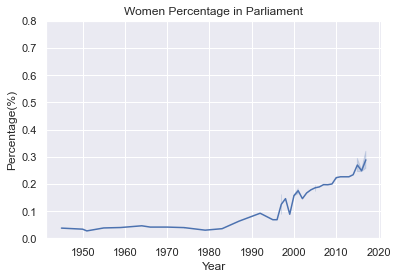

In [33]:
#k = 'Albania'
#df_country = df.query("country == ")

def lineplot_by_country(df, country_name):
    # define country
    df_country = df[df['country']==country_name]

    # draw line plot
    sns.set_theme()
    ax = sns.lineplot(data=df_country, x="year", y="women_perc")
    ax.set(title='Women Percentage in Parliament')
    ax.set(ylim=(0, 0.8))
    ax.set_ylabel('Percentage(%)')
    ax.set_xlabel('Year')

lineplot_by_country(df,'United Kingdom')

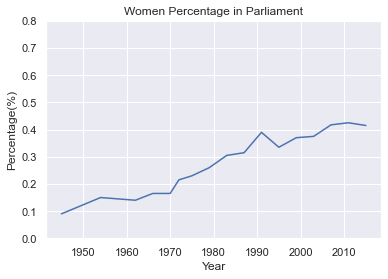

In [36]:
lineplot_by_country(df,'Finland')